In [1]:

# change working directory
import os 
os.chdir('E:/I_Lan_GMPE_2020/Python_ILAN')


import pandas as pd
import numpy as np
import pygmm 
import pylib.pylib_P20NGATW as Pgmm

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120
import matplotlib.gridspec as gridspec
#warning
import warnings
warnings.filterwarnings("ignore")


In [2]:
#evaluate Abrahamson et al. 2014 GMM
eq_scen = {'mag': 7, 'rrup': 30, 'rake': 0, 'dip': 90, 'ztor': 0, 'Vs30': 500, 'Z1': 50,'mechanism': 'SS','site_cond': 'rock'}
#define scenario GMM
gmm_scen = pygmm.model.Scenario(mag=eq_scen['mag'], dist_jb=eq_scen['rrup'], dist_rup=eq_scen['rrup'], 
                                dist_x = 0,
                                mechanism = eq_scen['mechanism'], dip = eq_scen['dip'],
                                depth_tor = eq_scen['ztor'],
                                v_s30=eq_scen['Vs30'], site_cond=eq_scen['site_cond'])
#evaluate Abrahamson et al. 2014 GMM
gmm_ASK14 = pygmm.AbrahamsonSilvaKamai2014(gmm_scen)

# cal period from ASK14
periods = gmm_ASK14.periods

In [3]:
# Initiate the gmm model
gmmp21 = Pgmm.Phung2020h_NGATW()


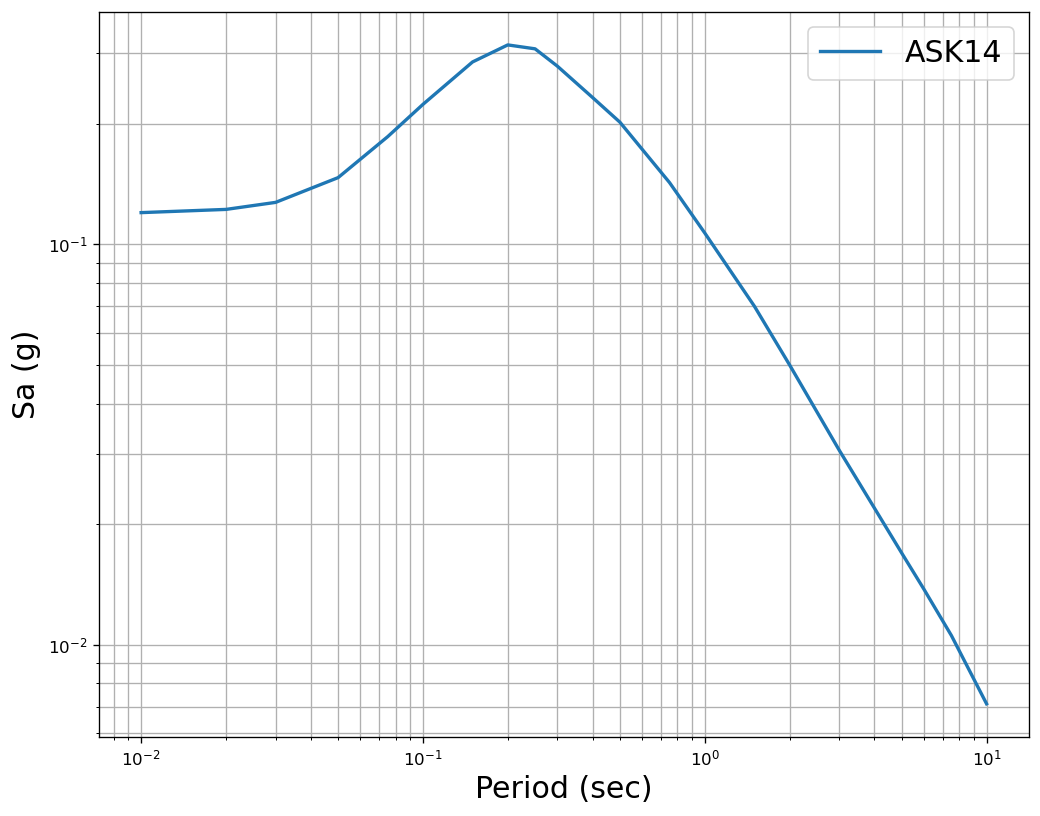

In [4]:

#plot impulse response of SDOF
fig, ax = plt.subplots(figsize=(10,8))
ax.loglog(gmm_ASK14.periods,gmm_ASK14.spec_accels,'-', linewidth=2, label='ASK14')
ax.set_xlabel('Period (sec)', fontsize=18)
ax.set_ylabel('Sa (g)', fontsize=18)
ax.legend(fontsize=18)
ax.grid(which='both')

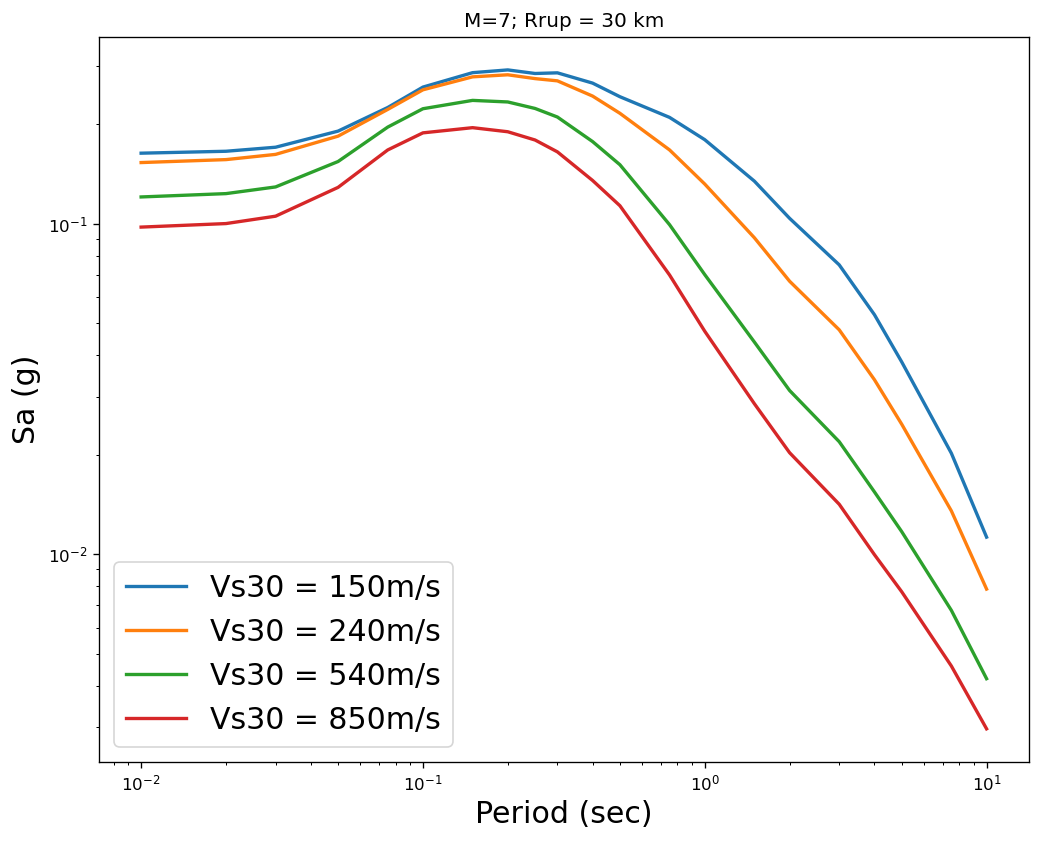

In [5]:
fig, ax = plt.subplots(figsize=(10,8))
for Vs30 in np.array([150,  240, 540, 850]):
    ypred = []
    for p in periods:
        # print(p)
        y = gmmp21.Ph2020_TW_p(p, mag=eq_scen['mag'], ztor=eq_scen['ztor'], rake=eq_scen['rake'],
                         delta=eq_scen['dip'], Rrup=eq_scen['rrup'], Vs30 = Vs30, Z1=-999)[0]
        ypred.append(y)
    ypred = np.stack(ypred).flatten()
    ax.loglog(gmm_ASK14.periods,ypred,'-', linewidth=2, label = "Vs30 = {}".format(Vs30) + "m/s",)
    ax.set_xlabel('Period (sec)', fontsize=18)
    ax.set_ylabel('Sa (g)', fontsize=18)
    ax.legend(fontsize=18)
    ax.grid(which='both')
    plt.title("M=7; Rrup = 30 km");